# Design, Analyse and Implement Image Processing with an Example

In [76]:
# Import Libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt


## Image Acquisition

(512, 512, 3)


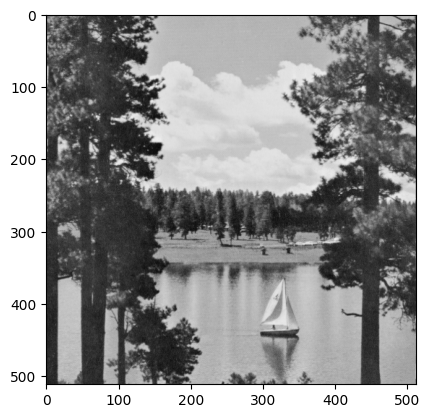

In [77]:
image=cv2.imread('lake.tif')
print(image.shape)
plt.imshow(image,cmap='gray')

## Image Preprocessing

### GrayScale conversion

In [78]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

(512, 512)


### Image Resizing

In [79]:
new_size = (640, 480)
# Resize the image
resized_image = cv2.resize(gray_image, new_size, interpolation=cv2.INTER_AREA)

print(resized_image.shape)

(480, 640)


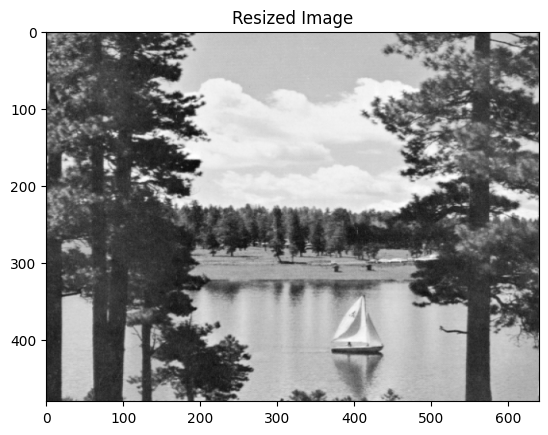

In [80]:
plt.title('Resized Image')
plt.imshow(resized_image,cmap='gray')


### Image Rotation

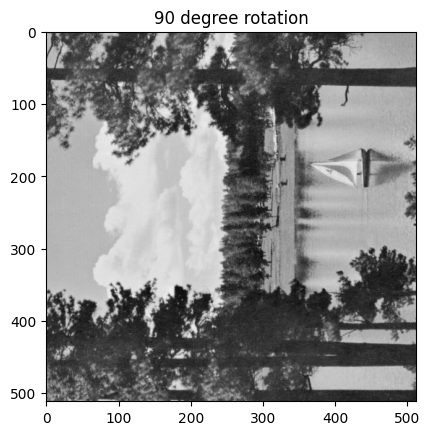

In [81]:
# Define the angle and center of rotation
angle = 90
center = (image.shape[1] // 2, image.shape[0] // 2)

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

# Rotate the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Show the original and rotated images
plt.title('90 degree rotation')
plt.imshow(rotated_image,cmap='gray')


### Noise Reduction

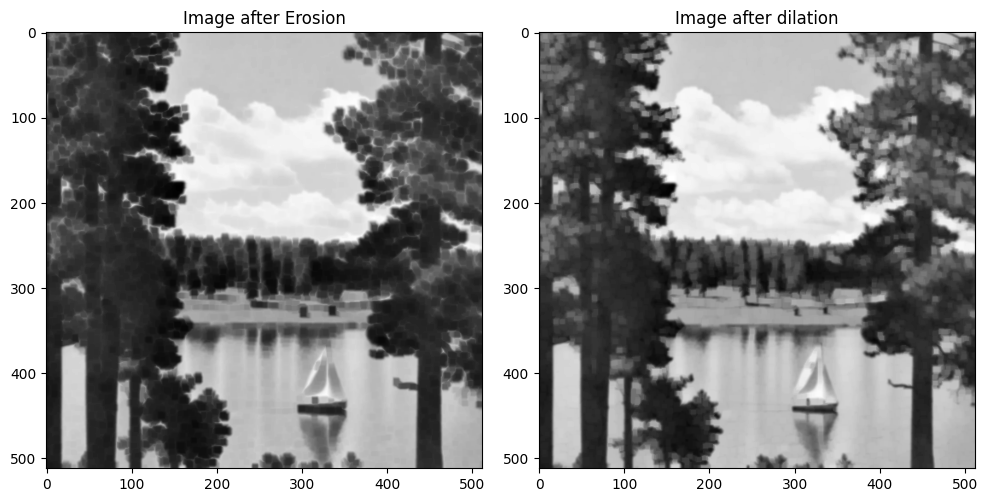

In [82]:
# Apply dilation and erosion to remove noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

erosion_kernel = np.ones((5, 5), np.uint8)
erosion_image = cv2.erode(blurred_image, erosion_kernel, iterations=1)

dilation_kernel = np.ones((5, 5), np.uint8)
dilation_image = cv2.dilate(erosion_image, dilation_kernel, iterations=1)

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.title('Image after Erosion')
plt.imshow(erosion_image,cmap='gray')
plt.subplot(1,2,2)
plt.title('Image after dilation')
plt.imshow(dilation_image,cmap='gray')
plt.tight_layout()

## Image Enhancement

### Sharpening

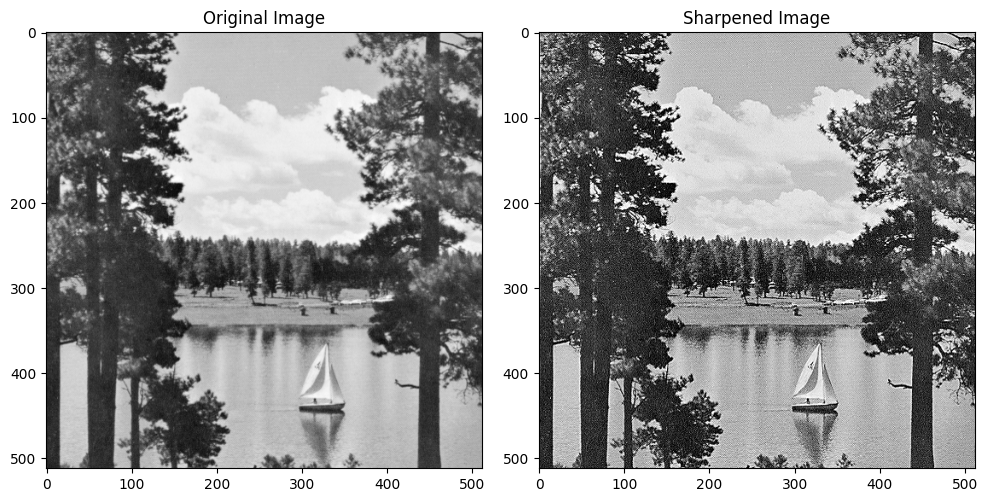

In [83]:
# Define the sharpening kernel (Laplacian kernel)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Apply the sharpening kernel using filter2D
sharpened_image = cv2.filter2D(gray_image, -1, sharpening_kernel)

# Display the original and sharpened images
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray_image,cmap='gray')
plt.subplot(1,2,2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image,cmap='gray')
plt.tight_layout()

### Gamma Correction

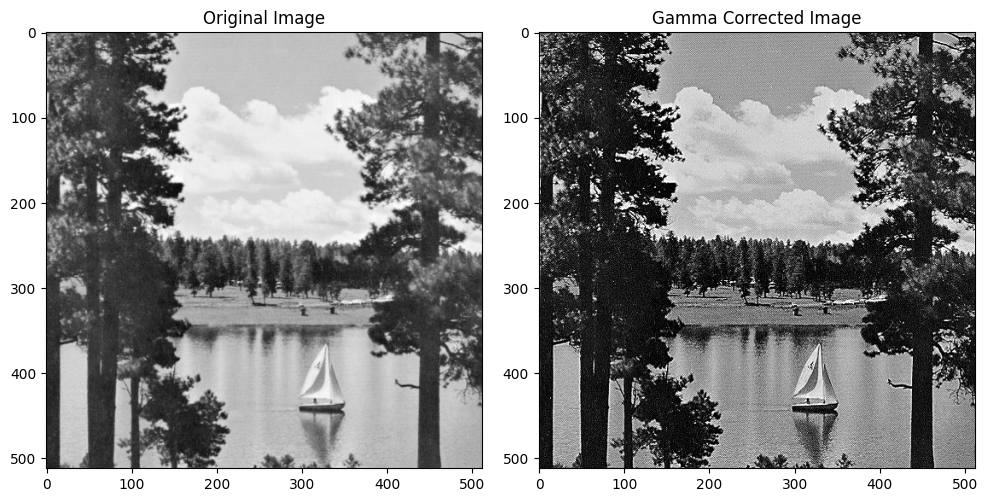

In [84]:
# Apply power law transformation
gamma_corrected = np.power(sharpened_image / 255.0, 1.5) * 255.0
gamma_corrected = np.uint8(gamma_corrected)

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray_image,cmap='gray')
plt.subplot(1,2,2)
plt.title('Gamma Corrected Image')
plt.imshow(gamma_corrected,cmap='gray')
plt.tight_layout()

## Edge detection

### Binary Thresholding

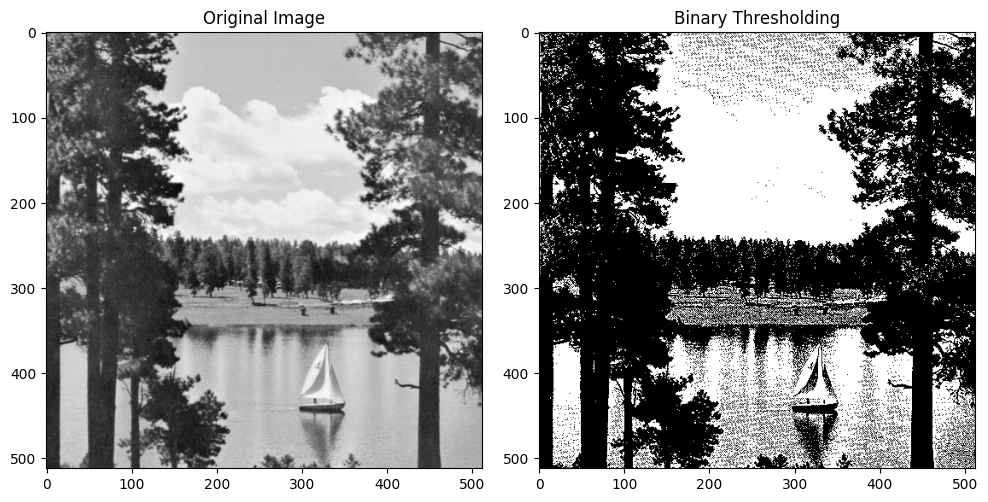

In [85]:
# Use Binary thresholding to manipulate each pixel values
threshold_value = 127
thresholded_image = np.where(gamma_corrected < threshold_value, 0, 255)


plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray_image,cmap='gray')
plt.subplot(1,2,2)
plt.title('Binary Thresholding')
plt.imshow(thresholded_image,cmap='gray')
plt.tight_layout()

### Canny Filter

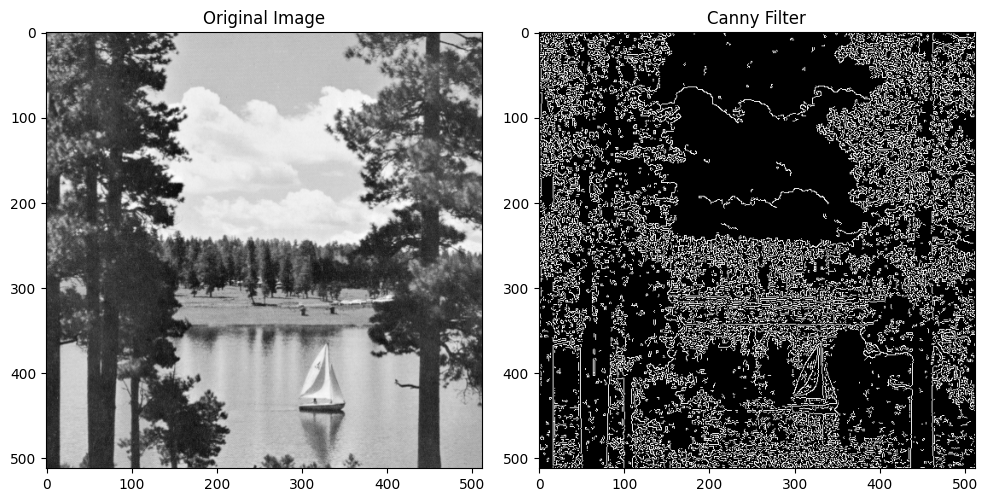

In [86]:
# Use canny filter to detect edges

edges = cv2.Canny(gamma_corrected.astype(np.uint8), threshold1=100, threshold2=200)

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray_image,cmap='gray')
plt.subplot(1,2,2)
plt.title('Canny Filter')
plt.imshow(edges,cmap='gray')
plt.tight_layout()